In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
from scipy import stats

In [2]:
bank = pd.read_csv('Bank.csv')

#### The numpy where method:
***where(logical condition, value if true, value if false)***

In [4]:
bank['GenderDummy_F'] = np.where(bank['Gender'] == 'Female',1,0)

In [5]:
bank.head()

,Employee,EducLev,JobGrade,YrHired,YrBorn,Gender,YrsPrior,PCJob,Salary,Mgmt,GenderDummy_F
0,1,3,1,92,69,Male,1,No,32.0,Non-Mgmt,0
1,2,1,1,81,57,Female,1,No,39.1,Non-Mgmt,1
2,3,1,1,83,60,Female,0,No,33.2,Non-Mgmt,1
3,4,2,1,87,55,Female,7,No,30.6,Non-Mgmt,1
4,5,3,1,92,67,Male,0,No,29.0,Non-Mgmt,0


#### Applying a function:
Pandas aslo has a special method - apply, which applies an expression to each element of the series object. Expression to each element of the series object.

In [6]:
def my_recode(gender):
    if gender == 'Female':
        return 1
    else:
        return 0

In [8]:
my_recode("Female"), my_recode("Male")

(1, 0)

Now, we use the pandas apply(), method to call the function for each value of the Gender column:

In [9]:
bank['GenderDummy_F'] = bank['Gender'].apply(my_recode)
bank.head()

,Employee,EducLev,JobGrade,YrHired,YrBorn,Gender,YrsPrior,PCJob,Salary,Mgmt,GenderDummy_F
0,1,3,1,92,69,Male,1,No,32.0,Non-Mgmt,0
1,2,1,1,81,57,Female,1,No,39.1,Non-Mgmt,1
2,3,1,1,83,60,Female,0,No,33.2,Non-Mgmt,1
3,4,2,1,87,55,Female,7,No,30.6,Non-Mgmt,1
4,5,3,1,92,67,Male,0,No,29.0,Non-Mgmt,0


Applying a lambda function:
A more elegant approach is to apply a lambda function in python. 

In [10]:
bank['GenderDummy_F'] = bank['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
bank.head()

,Employee,EducLev,JobGrade,YrHired,YrBorn,Gender,YrsPrior,PCJob,Salary,Mgmt,GenderDummy_F
0,1,3,1,92,69,Male,1,No,32.0,Non-Mgmt,0
1,2,1,1,81,57,Female,1,No,39.1,Non-Mgmt,1
2,3,1,1,83,60,Female,0,No,33.2,Non-Mgmt,1
3,4,2,1,87,55,Female,7,No,30.6,Non-Mgmt,1
4,5,3,1,92,67,Male,0,No,29.0,Non-Mgmt,0


Replacing values from a list:
- pandas has a replace method that can take lists. For example, we could take a list of job grades (1-6) and a corresponding list of managerial status for each of the job grades.

In [11]:
bank['JobGrade'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [12]:
grades = [1,2,3,4,5,6]
status = ['non-mgmt','non-mgmt','non-mgmt','non-mgmt','mgmt','mgmt']

bank['Manager'] = bank['JobGrade'].replace(grades,status)

bank[170:175]

,Employee,EducLev,JobGrade,YrHired,YrBorn,Gender,YrsPrior,PCJob,Salary,Mgmt,GenderDummy_F,Manager
170,171,2,4,79,42,Female,1,No,45.5,Non-Mgmt,1,non-mgmt
171,172,3,4,84,58,Female,0,No,44.5,Non-Mgmt,1,non-mgmt
172,173,2,4,82,55,Female,2,No,51.2,Non-Mgmt,1,non-mgmt
173,174,5,5,88,61,Male,0,No,47.5,Mgmt,0,mgmt
174,175,5,5,87,58,Female,0,No,44.5,Mgmt,1,mgmt


In [13]:
genders = ['Female','Male']
dummy_vars = [1,0]

bank['GenderDummy_F'] = bank['Gender'].replace(genders, dummy_vars)
bank.head()

C:\Users\blais\AppData\Local\Temp\ipykernel_43132\1731351841.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank['GenderDummy_F'] = bank['Gender'].replace(genders, dummy_vars)


,Employee,EducLev,JobGrade,YrHired,YrBorn,Gender,YrsPrior,PCJob,Salary,Mgmt,GenderDummy_F,Manager
0,1,3,1,92,69,Male,1,No,32.0,Non-Mgmt,0,non-mgmt
1,2,1,1,81,57,Female,1,No,39.1,Non-Mgmt,1,non-mgmt
2,3,1,1,83,60,Female,0,No,33.2,Non-Mgmt,1,non-mgmt
3,4,2,1,87,55,Female,7,No,30.6,Non-Mgmt,1,non-mgmt
4,5,3,1,92,67,Male,0,No,29.0,Non-Mgmt,0,non-mgmt


In [14]:
import seaborn as sns

#### Logging Variables:

We occasionally want to transform a numerical column in order to increase the linearity of our models. We can use the numpy log() function which returns the natural (base e) logarithm.

<Axes: xlabel='Salary', ylabel='Count'>

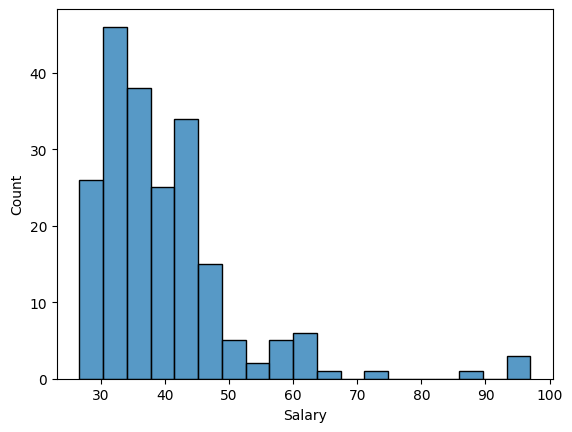

In [15]:
sns.histplot(x=bank['Salary'])

In [16]:
bank['logSalary'] = np.log(bank['Salary'])

<Axes: xlabel='logSalary', ylabel='Count'>

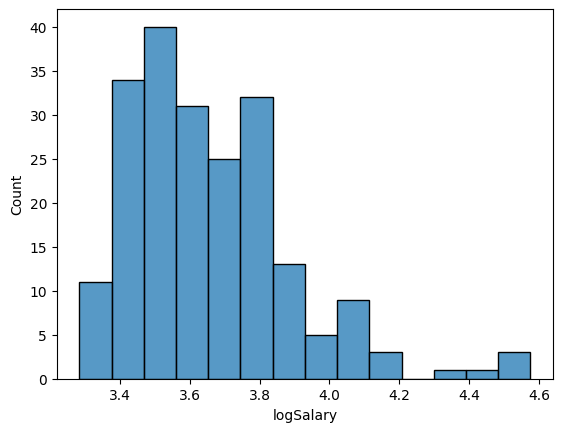

In [17]:
sns.histplot(x=bank['logSalary'])

In [19]:
fitted_data, fitted_lambda = stats.boxcox(bank['Salary'])

<Axes: ylabel='Count'>

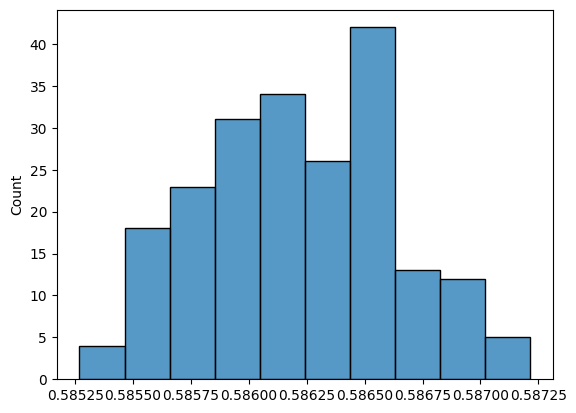

In [20]:
sns.histplot(x=fitted_data)

In [21]:
fitted_lambda

-1.7022446799436273

Logging Variables:

C:\Users\blais\AppData\Local\Temp\ipykernel_43132\3380745248.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=bank['logSalary'],shade=True,linewidth=2);


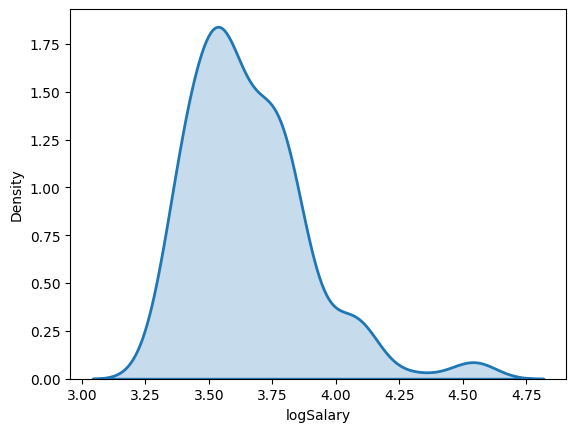

In [24]:
sns.kdeplot(x=bank['logSalary'],shade=True,linewidth=2);

C:\Users\blais\AppData\Local\Temp\ipykernel_43132\3375467372.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=fitted_data,shade=True,linewidth=2);


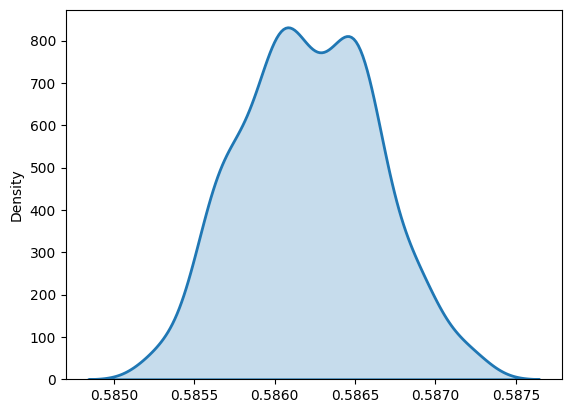

In [25]:
sns.kdeplot(x=fitted_data,shade=True,linewidth=2);